#### 1.Isoseqsim pb

In [1]:
import os
import shutil

# Define the base directory
base_dir = os.getcwd()

# Traverse the directory tree
for root, dirs, files in os.walk(base_dir):
    for dir_name in dirs:
        # Remove .ipynb_checkpoints directories
        if dir_name == '.ipynb_checkpoints':
            checkpoint_dir = os.path.join(root, dir_name)
            shutil.rmtree(checkpoint_dir)
            print(f'Removed {checkpoint_dir}')
        # Remove __pycache__ directories
        elif dir_name == '__pycache__':
            pycache_dir = os.path.join(root, dir_name)
            shutil.rmtree(pycache_dir)
            print(f'Removed {pycache_dir}')

Removed /home/jupyter/projects/LRAA_manuscript_benchmarking/.ipynb_checkpoints


In [6]:
import os
import shutil
import subprocess

# Add the directory containing gffcompare to the PATH environment variable
os.environ['PATH'] += os.pathsep + '/opt/conda/envs/mas_seq/bin'

# Define the species and their corresponding sample names
species_samples = {
    'Arabidopsis': 'arabidopsis_isoseqsim',
    'Mouse': 'mouse_isoseqsim',
    'Magnaporthe': 'magnaporthe_isoseqsim'
}

# Define the sample suffixes
sample_suffixes = ['e000', 'e016', 'e050', 'e085']

# Define the base paths
base_path = os.getcwd()
benchmarking_script = os.path.join(base_path, 'benchmarking_scripts/bmarking_scripts/Reduced_Reference_BenchmarkingSimdata.py')

# Ensure the log directory exists
log_dir = os.path.join(base_path, 'log')
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# Open a log file to capture the output
with open(os.path.join(log_dir, 'script_run_history1.log'), 'w') as log_file:
    for sp, sample_base in species_samples.items():
        for suffix in sample_suffixes:
            sample = f'{sample_base}_{suffix}'
            if sp == 'Arabidopsis':
                ref_expressed_gtf = os.path.join(base_path, 'references/1.isoseqsim_pb/Arabidopsis/Araport11_GTF_genes_transposons.May2023.pigeon2_cleaned_with_gene_expressed.gtf')
                ref_expressed_kept_gtf = os.path.join(base_path, 'references/1.isoseqsim_pb/Arabidopsis/Araport11_GTF_genes_transposons.May2023.pigeon2_cleaned_with_gene_1isoformPerGene_expressed_kept.gtf')
            elif sp == 'Mouse':
                ref_expressed_gtf = os.path.join(base_path, 'references/1.isoseqsim_pb/Mouse/gencode.vM32.annotation_expressed.gtf')
                ref_expressed_kept_gtf = os.path.join(base_path, 'references/1.isoseqsim_pb/Mouse/gencode.vM32.annotation_1isoformPerGene_expressed_kept.gtf')
            elif sp == 'Magnaporthe':
                ref_expressed_gtf = os.path.join(base_path, 'references/1.isoseqsim_pb/Magnaporthe/GCF_000002495.2_MG8_annotation4_with_genes_expressed.gtf')
                ref_expressed_kept_gtf = os.path.join(base_path, 'references/1.isoseqsim_pb/Magnaporthe/GCF_000002495.2_MG8_annotation4_with_genes_1isoformPerGene_expressed_kept.gtf')

            reco_gtfs = os.path.join(base_path, f'terra_outputs/1.isoseqsim_pb/{sample}/ID_refguided/*')
            dataset_name = f'{sample}_ref_guided'
            working_dir = os.path.join(base_path, f'benchmarking_results/1.isoseqsim_pb/{sp.lower()}/ID_refguided/{sample}/')

            # Ensure the working directory exists, and overwrite if it already exists
            if os.path.exists(working_dir):
                shutil.rmtree(working_dir)
            os.makedirs(working_dir)

            # Change the current working directory
            os.chdir(working_dir)

            # Run the benchmarking script
            command = f'python3 {benchmarking_script} --ref_expressed_gtf {ref_expressed_gtf} --ref_expressed_kept_gtf {ref_expressed_kept_gtf} --reco_gtfs {reco_gtfs} --dataset_name {dataset_name}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)

            # Remove .tmap files from the references directory
            command = f'rm {os.path.join(base_path, f"references/1.isoseqsim_pb/{sp}/*.tmap")}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)

            command = f'rm {os.path.join(base_path, f"terra_outputs/1.isoseqsim_pb/{sample}/ID_refguided/*.tmap")}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)

            # Move back to base directory
            os.chdir(base_path)

In [4]:
import os
import shutil
import subprocess

# Add the directory containing gffcompare to the PATH environment variable
os.environ['PATH'] += os.pathsep + '/opt/conda/envs/mas_seq/bin'

# Define the species and their corresponding sample names
species_samples = {
    'Arabidopsis': 'arabidopsis_isoseqsim',
    'Mouse': 'mouse_isoseqsim',
    'Magnaporthe': 'magnaporthe_isoseqsim'
}

# Define the sample suffixes
sample_suffixes = ['e000', 'e016', 'e050', 'e085']

# Define the base paths
base_path = os.getcwd()
benchmarking_script = os.path.join(base_path, 'benchmarking_scripts/bmarking_scripts/RefFreeReco_EvalByRef_BenchmarkingSimdata.py')

# Ensure the log directory exists
log_dir = os.path.join(base_path, 'log')
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# Open a log file to capture the output
with open(os.path.join(log_dir, 'script_run_history2.log'), 'w') as log_file:
    for sp, sample_base in species_samples.items():
        for suffix in sample_suffixes:
            sample = f'{sample_base}_{suffix}'
            if sp == 'Arabidopsis':
                ref_expressed_gtf = os.path.join(base_path, 'references/1.isoseqsim_pb/Arabidopsis/Araport11_GTF_genes_transposons.May2023.pigeon2_cleaned_with_gene_expressed.gtf')
                ref_expressed_kept_gtf = os.path.join(base_path, 'references/1.isoseqsim_pb/Arabidopsis/Araport11_GTF_genes_transposons.May2023.pigeon2_cleaned_with_gene_1isoformPerGene_expressed_kept.gtf')
            elif sp == 'Mouse':
                ref_expressed_gtf = os.path.join(base_path, 'references/1.isoseqsim_pb/Mouse/gencode.vM32.annotation_expressed.gtf')
                ref_expressed_kept_gtf = os.path.join(base_path, 'references/1.isoseqsim_pb/Mouse/gencode.vM32.annotation_1isoformPerGene_expressed_kept.gtf')
            elif sp == 'Magnaporthe':
                ref_expressed_gtf = os.path.join(base_path, 'references/1.isoseqsim_pb/Magnaporthe/GCF_000002495.2_MG8_annotation4_with_genes_expressed.gtf')
                ref_expressed_kept_gtf = os.path.join(base_path, 'references/1.isoseqsim_pb/Magnaporthe/GCF_000002495.2_MG8_annotation4_with_genes_1isoformPerGene_expressed_kept.gtf')

            reco_gtfs = os.path.join(base_path, f'terra_outputs/1.isoseqsim_pb/{sample}/ID_reffree/*')
            dataset_name = f'{sample}_ref_free'
            working_dir = os.path.join(base_path, f'benchmarking_results/1.isoseqsim_pb/{sp.lower()}/ID_reffree/{sample}/')

            # Ensure the working directory exists, and overwrite if it already exists
            if os.path.exists(working_dir):
                shutil.rmtree(working_dir)
            os.makedirs(working_dir)

            # Change the current working directory
            os.chdir(working_dir)

            # Run the benchmarking script
            command = f'python3 {benchmarking_script} --ref_expressed_gtf {ref_expressed_gtf} --reco_gtfs {reco_gtfs} --dataset_name {dataset_name}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)

            # Remove .tmap files from the references directory
            command = f'rm {os.path.join(base_path, f"references/1.isoseqsim_pb/{sp}/*.tmap")}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)

            command = f'rm {os.path.join(base_path, f"terra_outputs/1.isoseqsim_pb/{sample}/ID_reffree/*.tmap")}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)
            
            command = f'rm {os.path.join(base_path, f"terra_outputs/1.isoseqsim_pb/{sample}/ID_reffree/*.refmap")}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)

            # Move back to base directory
            os.chdir(base_path)

In [6]:
import os
import shutil

# Define the base directory
base_dir = os.path.join(os.getcwd(), 'benchmarking_results/1.isoseqsim_pb')

# Traverse the directory tree
for root, dirs, files in os.walk(base_dir):
    # Skip the base directory itself
    if root == base_dir:
        continue
    for file in files:
        if file.endswith('.png') or file.endswith('.tsv'):
            # Construct the full file path
            file_path = os.path.join(root, file)
            # Construct the destination file path
            dest_path = os.path.join(base_dir, file)
            # Remove the file if it already exists in the destination directory
            if os.path.exists(dest_path):
                os.remove(dest_path)
            # Move the file to the base directory
            shutil.move(file_path, base_dir)
            print(f'Moved {file_path} to {base_dir}')

Moved /home/jupyter/projects/LRAA_manuscript_benchmarking/benchmarking_results/1.isoseqsim_pb/mouse/ID_reffree/mouse_isoseqsim_e085/mouse_isoseqsim_e085_ref_free_analysis_summary_reffree.png to /home/jupyter/projects/LRAA_manuscript_benchmarking/benchmarking_results/1.isoseqsim_pb
Moved /home/jupyter/projects/LRAA_manuscript_benchmarking/benchmarking_results/1.isoseqsim_pb/mouse/ID_reffree/mouse_isoseqsim_e085/mouse_isoseqsim_e085_ref_free_analysis_summary_reffree.tsv to /home/jupyter/projects/LRAA_manuscript_benchmarking/benchmarking_results/1.isoseqsim_pb
Moved /home/jupyter/projects/LRAA_manuscript_benchmarking/benchmarking_results/1.isoseqsim_pb/mouse/ID_reffree/mouse_isoseqsim_e000/mouse_isoseqsim_e000_ref_free_analysis_summary_reffree.png to /home/jupyter/projects/LRAA_manuscript_benchmarking/benchmarking_results/1.isoseqsim_pb
Moved /home/jupyter/projects/LRAA_manuscript_benchmarking/benchmarking_results/1.isoseqsim_pb/mouse/ID_reffree/mouse_isoseqsim_e000/mouse_isoseqsim_e000_r

#### 2. SIRVs pb

In [13]:
import os
import shutil
import subprocess

# Add the directory containing gffcompare to the PATH environment variable
os.environ['PATH'] += os.pathsep + '/opt/conda/envs/mas_seq/bin'

# Define the 12 folders
folders = [
    'CL_BT474_E0_sirv', 'CL_BT474_E1_sirv', 'CL_BT474_E2_sirv',
    'CL_HG002_E0_sirv', 'CL_HG002_E1_sirv', 'CL_HG002_E2_sirv',
    'CL_K562_E0_sirv', 'CL_K562_E1_sirv', 'CL_K562_E2_sirv',
    'CL_UHRR_E0_sirv', 'CL_UHRR_E1_sirv', 'CL_UHRR_E2_sirv'
]

# Define the subdirectories
subdirs = ['ID_refguided']

# Define the base paths
base_path = os.getcwd()
benchmarking_script = os.path.join(base_path, 'benchmarking_scripts/bmarking_scripts/Reduced_Reference_BenchmarkingSimdata.py')

# Ensure the log directory exists
log_dir = os.path.join(base_path, 'log')
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# Define placeholders for missing variables
ref_expressed_gtf = os.path.join(base_path,'references/2.sirvs_pb/SIRV_isoforms_multi-fasta-annotation.expressed_pigeon.gtf')
ref_expressed_kept_gtf = os.path.join(base_path,'references/2.sirvs_pb/SIRV_isoforms_multi-fasta-annotation.expressed_kept_1isoform_pigeon.gtf')

# Define the parameter for the directory
param_dir = '2.sirvs_pb'

# Open a log file to capture the output
with open(os.path.join(log_dir, 'script_run_history3.log'), 'w') as log_file:
    for folder in folders:
        for subdir in subdirs:
            working_dir = os.path.join(base_path, f'benchmarking_results/{param_dir}/{folder}/{subdir}/')

            # Ensure the working directory exists, and overwrite if it already exists
            if os.path.exists(working_dir):
                shutil.rmtree(working_dir)
            os.makedirs(working_dir)

            # Change the current working directory
            os.chdir(working_dir)

            # Define reco_gtfs and dataset_name based on folder and subdir
            reco_gtfs = os.path.join(base_path, f'terra_outputs/{param_dir}/{folder}/{subdir}/*')
            dataset_name = f'{folder}_{subdir.lower()}'

            # Run the benchmarking script
            command = f'python3 {benchmarking_script} --ref_expressed_gtf {ref_expressed_gtf} --ref_expressed_kept_gtf {ref_expressed_kept_gtf} --reco_gtfs {reco_gtfs} --dataset_name {dataset_name}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)

            # Remove .tmap files from the references directory
            command = f'rm {os.path.join(base_path, f"references/{param_dir}/{folder}/*.tmap")}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)

            command = f'rm {os.path.join(base_path, f"terra_outputs/{param_dir}/{folder}/{subdir}/*.tmap")}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)

            # Move back to base directory
            os.chdir(base_path)

In [15]:
import os
import shutil
import subprocess

# Add the directory containing gffcompare to the PATH environment variable
os.environ['PATH'] += os.pathsep + '/opt/conda/envs/mas_seq/bin'

# Define the 12 folders
folders = [
    'CL_BT474_E0_sirv', 'CL_BT474_E1_sirv', 'CL_BT474_E2_sirv',
    'CL_HG002_E0_sirv', 'CL_HG002_E1_sirv', 'CL_HG002_E2_sirv',
    'CL_K562_E0_sirv', 'CL_K562_E1_sirv', 'CL_K562_E2_sirv',
    'CL_UHRR_E0_sirv', 'CL_UHRR_E1_sirv', 'CL_UHRR_E2_sirv'
]

# Define the subdirectories
subdirs = ['ID_reffree']

# Define the base paths
base_path = os.getcwd()
benchmarking_script = os.path.join(base_path, 'benchmarking_scripts/bmarking_scripts/RefFreeReco_EvalByRef_BenchmarkingSimdata.py')

# Ensure the log directory exists
log_dir = os.path.join(base_path, 'log')
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# Define placeholders for missing variables
ref_expressed_gtf = os.path.join(base_path, 'references/2.sirvs_pb/SIRV_isoforms_multi-fasta-annotation.expressed_pigeon.gtf')

# Define the parameter for the dataset
dataset_param = '2.sirvs_pb'

# Open a log file to capture the output
with open(os.path.join(log_dir, 'script_run_history4.log'), 'w') as log_file:
    for folder in folders:
        for subdir in subdirs:
            working_dir = os.path.join(base_path, f'benchmarking_results/{dataset_param}/{folder}/{subdir}/')

            # Ensure the working directory exists, and overwrite if it already exists
            if os.path.exists(working_dir):
                shutil.rmtree(working_dir)
            os.makedirs(working_dir)

            # Change the current working directory
            os.chdir(working_dir)

            # Define reco_gtfs and dataset_name based on folder and subdir
            reco_gtfs = os.path.join(base_path, f'terra_outputs/{dataset_param}/{folder}/{subdir}/*')
            dataset_name = f'{folder}_{subdir.lower()}'

            # Run the benchmarking script
            command = f'python3 {benchmarking_script} --ref_expressed_gtf {ref_expressed_gtf} --reco_gtfs {reco_gtfs} --dataset_name {dataset_name}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)

            # Remove .tmap files from the references directory
            command = f'rm {os.path.join(base_path, f"references/{dataset_param}/{folder}/*.tmap")}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)

            command = f'rm {os.path.join(base_path, f"terra_outputs/{dataset_param}/{folder}/{subdir}/*.tmap")}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)

            command = f'rm {os.path.join(base_path, f"terra_outputs/{dataset_param}/{folder}/ID_reffree/*.refmap")}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)

            # Move back to base directory
            os.chdir(base_path)

In [16]:
import os
import shutil

# Define the base directory
base_dir = os.path.join(os.getcwd(), 'benchmarking_results/2.sirvs_pb')

# Traverse the directory tree
for root, dirs, files in os.walk(base_dir):
    # Skip the base directory itself
    if root == base_dir:
        continue
    for file in files:
        if file.endswith('.png') or file.endswith('.tsv'):
            # Construct the full file path
            file_path = os.path.join(root, file)
            # Construct the destination file path
            dest_path = os.path.join(base_dir, file)
            # Remove the file if it already exists in the destination directory
            if os.path.exists(dest_path):
                os.remove(dest_path)
            # Move the file to the base directory
            shutil.move(file_path, base_dir)
            print(f'Moved {file_path} to {base_dir}')

Moved /home/jupyter/projects/LRAA_manuscript_benchmarking/benchmarking_results/2.sirvs_pb/CL_K562_E0_sirv/ID_refguided/CL_K562_E0_sirv_id_refguided_analysis_summary_reduced.png to /home/jupyter/projects/LRAA_manuscript_benchmarking/benchmarking_results/2.sirvs_pb
Moved /home/jupyter/projects/LRAA_manuscript_benchmarking/benchmarking_results/2.sirvs_pb/CL_K562_E0_sirv/ID_refguided/CL_K562_E0_sirv_id_refguided_analysis_summary.tsv to /home/jupyter/projects/LRAA_manuscript_benchmarking/benchmarking_results/2.sirvs_pb
Moved /home/jupyter/projects/LRAA_manuscript_benchmarking/benchmarking_results/2.sirvs_pb/CL_K562_E0_sirv/ID_reffree/CL_K562_E0_sirv_id_reffree_analysis_summary_reffree.tsv to /home/jupyter/projects/LRAA_manuscript_benchmarking/benchmarking_results/2.sirvs_pb
Moved /home/jupyter/projects/LRAA_manuscript_benchmarking/benchmarking_results/2.sirvs_pb/CL_K562_E0_sirv/ID_reffree/CL_K562_E0_sirv_id_reffree_analysis_summary_reffree.png to /home/jupyter/projects/LRAA_manuscript_bench

#### 3. MORFs pb ont

In [46]:
import os
import shutil
import subprocess

# Add the directory containing gffcompare to the PATH environment variable
os.environ['PATH'] += os.pathsep + '/opt/conda/envs/mas_seq/bin'

# Define the 12 folders
folders = [
    'morf2_pacbio_merged_annot_compat_1isoform'
]

# Define the subdirectories
subdirs = ['ID_refguided']

# Define the base paths
base_path = os.getcwd()
benchmarking_script = os.path.join(base_path, 'benchmarking_scripts/bmarking_scripts/Reduced_Reference_BenchmarkingSimdata.py')

# Ensure the log directory exists
log_dir = os.path.join(base_path, 'log')
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# Define placeholders for missing variables
ref_expressed_gtf = os.path.join(base_path,'references/3.morfs_pb_ont/pb/minigenome.UTRs_trimmed_1isoformref_expressed_pacbio.gtf')
ref_expressed_kept_gtf = os.path.join(base_path,'references/3.morfs_pb_ont/pb/minigenome.UTRs_trimmed_1isoformref_expressed_kept_pacbio.gtf')

# Define the parameter for the directory
param_dir = '3.morfs_pb_ont'

# Open a log file to capture the output
with open(os.path.join(log_dir, 'script_run_history5.log'), 'w') as log_file:
    for folder in folders:
        for subdir in subdirs:
            working_dir = os.path.join(base_path, f'benchmarking_results/{param_dir}/{folder}/{subdir}/')

            # Ensure the working directory exists, and overwrite if it already exists
            if os.path.exists(working_dir):
                shutil.rmtree(working_dir)
            os.makedirs(working_dir)

            # Change the current working directory
            os.chdir(working_dir)

            # Define reco_gtfs and dataset_name based on folder and subdir
            reco_gtfs = os.path.join(base_path, f'terra_outputs/{param_dir}/{folder}/{subdir}/*')
            dataset_name = f'{folder}_{subdir.lower()}'

            # Run the benchmarking script
            command = f'python3 {benchmarking_script} --ref_expressed_gtf {ref_expressed_gtf} --ref_expressed_kept_gtf {ref_expressed_kept_gtf} --reco_gtfs {reco_gtfs} --dataset_name {dataset_name}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)

            # Remove .tmap files from the references directory
            command = f'rm {os.path.join(base_path, f"references/{param_dir}/pb/*.tmap")}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)

            command = f'rm {os.path.join(base_path, f"terra_outputs/{param_dir}/{folder}/{subdir}/*.tmap")}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)
            
            
            command = f'rm {os.path.join(base_path, f"terra_outputs/{param_dir}/{folder}/{subdir}/*.refmap")}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)            

            # Move back to base directory
            os.chdir(base_path)

In [47]:
import os
import shutil
import subprocess

# Add the directory containing gffcompare to the PATH environment variable
os.environ['PATH'] += os.pathsep + '/opt/conda/envs/mas_seq/bin'

# Define the 12 folders
folders = [
    'morf2_ont_merged_annot_compat_1isoform'
]

# Define the subdirectories
subdirs = ['ID_refguided']

# Define the base paths
base_path = os.getcwd()
benchmarking_script = os.path.join(base_path, 'benchmarking_scripts/bmarking_scripts/Reduced_Reference_BenchmarkingSimdata.py')

# Ensure the log directory exists
log_dir = os.path.join(base_path, 'log')
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# Define placeholders for missing variables
ref_expressed_gtf = os.path.join(base_path,'references/3.morfs_pb_ont/ont/minigenome.UTRs_trimmed_1isoformref_expressed.gtf')
ref_expressed_kept_gtf = os.path.join(base_path,'references/3.morfs_pb_ont/ont/minigenome.UTRs_trimmed_1isoformref_expressed_kept.gtf')

# Define the parameter for the directory
param_dir = '3.morfs_pb_ont'

# Open a log file to capture the output
with open(os.path.join(log_dir, 'script_run_history6.log'), 'w') as log_file:
    for folder in folders:
        for subdir in subdirs:
            working_dir = os.path.join(base_path, f'benchmarking_results/{param_dir}/{folder}/{subdir}/')

            # Ensure the working directory exists, and overwrite if it already exists
            if os.path.exists(working_dir):
                shutil.rmtree(working_dir)
            os.makedirs(working_dir)

            # Change the current working directory
            os.chdir(working_dir)

            # Define reco_gtfs and dataset_name based on folder and subdir
            reco_gtfs = os.path.join(base_path, f'terra_outputs/{param_dir}/{folder}/{subdir}/*')
            dataset_name = f'{folder}_{subdir.lower()}'

            # Run the benchmarking script
            command = f'python3 {benchmarking_script} --ref_expressed_gtf {ref_expressed_gtf} --ref_expressed_kept_gtf {ref_expressed_kept_gtf} --reco_gtfs {reco_gtfs} --dataset_name {dataset_name}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)

            # Remove .tmap files from the references directory
            command = f'rm {os.path.join(base_path, f"references/{param_dir}/ont/*.tmap")}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)

            command = f'rm {os.path.join(base_path, f"terra_outputs/{param_dir}/{folder}/{subdir}/*.tmap")}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)
            
            command = f'rm {os.path.join(base_path, f"terra_outputs/{param_dir}/{folder}/{subdir}/*.refmap")}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)

            # Move back to base directory
            os.chdir(base_path)

In [48]:
import os
import shutil
import subprocess

# Add the directory containing gffcompare to the PATH environment variable
os.environ['PATH'] += os.pathsep + '/opt/conda/envs/mas_seq/bin'

# Define the 12 folders
folders = [
    'morf2_pacbio_merged_annot_compat_1isoform'
]

# Define the subdirectories
subdirs = ['ID_reffree']

# Define the base paths
base_path = os.getcwd()
benchmarking_script = os.path.join(base_path, 'benchmarking_scripts/bmarking_scripts/RefFreeReco_EvalByRef_BenchmarkingSimdata.py')

# Ensure the log directory exists
log_dir = os.path.join(base_path, 'log')
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# Define placeholders for missing variables
ref_expressed_gtf = os.path.join(base_path,'references/3.morfs_pb_ont/pb/minigenome.UTRs_trimmed_1isoformref_expressed_pacbio.gtf')

# Define the parameter for the directory
param_dir = '3.morfs_pb_ont'

# Open a log file to capture the output
with open(os.path.join(log_dir, 'script_run_history7.log'), 'w') as log_file:
    for folder in folders:
        for subdir in subdirs:
            working_dir = os.path.join(base_path, f'benchmarking_results/{param_dir}/{folder}/{subdir}/')

            # Ensure the working directory exists, and overwrite if it already exists
            if os.path.exists(working_dir):
                shutil.rmtree(working_dir)
            os.makedirs(working_dir)

            # Change the current working directory
            os.chdir(working_dir)

            # Define reco_gtfs and dataset_name based on folder and subdir
            reco_gtfs = os.path.join(base_path, f'terra_outputs/{param_dir}/{folder}/{subdir}/*')
            dataset_name = f'{folder}_{subdir.lower()}'

            # Run the benchmarking script
            command = f'python3 {benchmarking_script} --ref_expressed_gtf {ref_expressed_gtf} --reco_gtfs {reco_gtfs} --dataset_name {dataset_name}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)

            # Remove .tmap files from the references directory
            command = f'rm {os.path.join(base_path, f"references/{param_dir}/pb/*.tmap")}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)

            command = f'rm {os.path.join(base_path, f"terra_outputs/{param_dir}/{folder}/{subdir}/*.tmap")}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)
            
            command = f'rm {os.path.join(base_path, f"terra_outputs/{param_dir}/{folder}/{subdir}/*.refmap")}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)

            # Move back to base directory
            os.chdir(base_path)

In [52]:
import os
import shutil
import subprocess

# Add the directory containing gffcompare to the PATH environment variable
os.environ['PATH'] += os.pathsep + '/opt/conda/envs/mas_seq/bin'

# Define the 12 folders
folders = [
    'morf2_ont_merged_annot_compat_1isoform'
]

# Define the subdirectories
subdirs = ['ID_reffree']

# Define the base paths
base_path = os.getcwd()
benchmarking_script = os.path.join(base_path, 'benchmarking_scripts/bmarking_scripts/RefFreeReco_EvalByRef_BenchmarkingSimdata.py')

# Ensure the log directory exists
log_dir = os.path.join(base_path, 'log')
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# Define placeholders for missing variables
ref_expressed_gtf = os.path.join(base_path,'references/3.morfs_pb_ont/ont/minigenome.UTRs_trimmed_1isoformref_expressed.gtf')

# Define the parameter for the directory
param_dir = '3.morfs_pb_ont'

# Open a log file to capture the output
with open(os.path.join(log_dir, 'script_run_history8.log'), 'w') as log_file:
    for folder in folders:
        for subdir in subdirs:
            working_dir = os.path.join(base_path, f'benchmarking_results/{param_dir}/{folder}/{subdir}/')

            # Ensure the working directory exists, and overwrite if it already exists
            if os.path.exists(working_dir):
                shutil.rmtree(working_dir)
            os.makedirs(working_dir)

            # Change the current working directory
            os.chdir(working_dir)

            # Define reco_gtfs and dataset_name based on folder and subdir
            reco_gtfs = os.path.join(base_path, f'terra_outputs/{param_dir}/{folder}/{subdir}/*')
            dataset_name = f'{folder}_{subdir.lower()}'

            # Run the benchmarking script
            command = f'python3 {benchmarking_script} --ref_expressed_gtf {ref_expressed_gtf} --reco_gtfs {reco_gtfs} --dataset_name {dataset_name}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)

            # Remove .tmap files from the references directory
            command = f'rm {os.path.join(base_path, f"references/{param_dir}/ont/*.tmap")}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)

            command = f'rm {os.path.join(base_path, f"terra_outputs/{param_dir}/{folder}/{subdir}/*.tmap")}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)
            
            command = f'rm {os.path.join(base_path, f"terra_outputs/{param_dir}/{folder}/{subdir}/*.refmap")}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)
            # Move back to base directory
            os.chdir(base_path)

In [53]:
import os
import shutil

# Define the base directory
base_dir = os.path.join(os.getcwd(), 'benchmarking_results/3.morfs_pb_ont')

# Traverse the directory tree
for root, dirs, files in os.walk(base_dir):
    # Skip the base directory itself
    if root == base_dir:
        continue
    for file in files:
        if file.endswith('.png') or file.endswith('.tsv'):
            # Construct the full file path
            file_path = os.path.join(root, file)
            # Construct the destination file path
            dest_path = os.path.join(base_dir, file)
            # Remove the file if it already exists in the destination directory
            if os.path.exists(dest_path):
                os.remove(dest_path)
            # Move the file to the base directory
            shutil.move(file_path, base_dir)
            print(f'Moved {file_path} to {base_dir}')

Moved /home/jupyter/projects/LRAA_manuscript_benchmarking/benchmarking_results/3.morfs_pb_ont/.ipynb_checkpoints/morf2_pacbio_merged_annot_compat_1isoform_id_reffree_analysis_summary_reffree-checkpoint.png to /home/jupyter/projects/LRAA_manuscript_benchmarking/benchmarking_results/3.morfs_pb_ont
Moved /home/jupyter/projects/LRAA_manuscript_benchmarking/benchmarking_results/3.morfs_pb_ont/.ipynb_checkpoints/morf2_pacbio_merged_annot_compat_1isoform_id_refguided_analysis_summary_reduced-checkpoint.png to /home/jupyter/projects/LRAA_manuscript_benchmarking/benchmarking_results/3.morfs_pb_ont
Moved /home/jupyter/projects/LRAA_manuscript_benchmarking/benchmarking_results/3.morfs_pb_ont/.ipynb_checkpoints/morf2_ont_merged_annot_compat_1isoform_id_refguided_analysis_summary_reduced-checkpoint.png to /home/jupyter/projects/LRAA_manuscript_benchmarking/benchmarking_results/3.morfs_pb_ont
Moved /home/jupyter/projects/LRAA_manuscript_benchmarking/benchmarking_results/3.morfs_pb_ont/morf2_ont_merg

#### benchmarking on real cell lines using approximate ground truth

#### Reffree

In [2]:
import os
import shutil
import subprocess

# Add the directory containing gffcompare to the PATH environment variable
os.environ['PATH'] += os.pathsep + '/opt/conda/envs/mas_seq/bin'

# Define the 12 folders
folders = [
    'CL_BT474_E0_human', 'CL_BT474_E1_human', 'CL_BT474_E2_human',
    'CL_HG002_E0_human', 'CL_HG002_E1_human', 'CL_HG002_E2_human',
    'CL_K562_E0_human', 'CL_K562_E1_human', 'CL_K562_E2_human',
    'CL_UHRR_E0_human', 'CL_UHRR_E1_human', 'CL_UHRR_E2_human'
]

# Define the subdirectories
subdirs = ['ID_reffree']

# Define the base paths
base_path = os.getcwd()
benchmarking_script = os.path.join(base_path, 'benchmarking_scripts/bmarking_scripts/VennReco_BenchmarkingRealdata.py')

# Ensure the log directory exists
log_dir = os.path.join(base_path, 'log')
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# Define placeholders for missing variables
ref_expressed_gtf = os.path.join(base_path, 'references/4.cell_lines_pb/GRCh38.gencode.v39.annotation.sorted.gtf')

# Define the parameter for the dataset
dataset_param = '4.cell_lines_pb'

# Open a log file to capture the output
with open(os.path.join(log_dir, 'script_run_history9.log'), 'w') as log_file:
    for folder in folders:
        for subdir in subdirs:
            working_dir = os.path.join(base_path, f'benchmarking_results/{dataset_param}/{folder}/{subdir}/')

            # Ensure the working directory exists, and overwrite if it already exists
            if os.path.exists(working_dir):
                shutil.rmtree(working_dir)
            os.makedirs(working_dir)

            # Change the current working directory
            os.chdir(working_dir)

            # Define reco_gtfs and dataset_name based on folder and subdir
            reco_gtfs = os.path.join(base_path, f'terra_outputs/{dataset_param}/{folder}/{subdir}/*')
            dataset_name = f'{folder}_{subdir.lower()}'

            # Run the benchmarking script
            command = f'python3 {benchmarking_script} --ref_expressed_or_kept_gtf {ref_expressed_gtf} --reco_gtfs {reco_gtfs} --dataset_name {dataset_name}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)

            # Remove .tmap files from the references directory
            command = f'rm {os.path.join(base_path, f"references/{dataset_param}/{folder}/*.tmap")}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)

            command = f'rm {os.path.join(base_path, f"terra_outputs/{dataset_param}/{folder}/{subdir}/*.tmap")}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)

            command = f'rm {os.path.join(base_path, f"terra_outputs/{dataset_param}/{folder}/ID_reffree/*.refmap")}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)

            # Move back to base directory
            os.chdir(base_path)


In [10]:
import os
import pandas as pd

def generate_metrics():
    base_dir = os.getcwd()

    folders = [
        "CL_BT474_E0_human", "CL_BT474_E1_human", "CL_BT474_E2_human", "CL_HG002_E0_human", "CL_HG002_E1_human",
        "CL_HG002_E2_human", "CL_K562_E0_human", "CL_K562_E1_human", "CL_K562_E2_human",
        "CL_UHRR_E0_human", "CL_UHRR_E1_human", "CL_UHRR_E2_human"
    ]

    def calculate_metrics_for_tool(folder_name):
        tracking_file_path = os.path.join(base_dir, "benchmarking_results/4.cell_lines_pb", folder_name, "ID_reffree/StringTie.denovo.tracking")
        
        # Define tools including IsoSeq
        tools = ["Bambu", "IsoQuant", "IsoSeq", "LRAA_0213", "Mandalorionfork", "StringTie"]
        
        metrics_by_tool = {tool: {'TP': 0, 'FP': 0, 'FN': 0, 'Precision': 0, 'Recall': 0, 'F1': 0} for tool in tools}
        
        with open(tracking_file_path, 'r') as file:
            for line in file:
                columns = line.strip().split('\t')
                ref = columns[4]
                tool_predictions = [columns[5], columns[6], columns[7], columns[8], columns[9], columns[10]]
                
                non_dash_count = sum(1 for prediction in tool_predictions if prediction != '-')
                
                for tool_index, prediction in enumerate(tool_predictions):
                    tool_name = tools[tool_index]
                    
                    if ref != '-' and prediction != '-':
                        metrics_by_tool[tool_name]['TP'] += 1
                    elif ref != '-' and non_dash_count >= 1 and prediction == '-':
                        metrics_by_tool[tool_name]['FN'] += 1
                    elif ref == '-' and non_dash_count == 1 and prediction != '-':
                        metrics_by_tool[tool_name]['FP'] += 1
        
        for tool, metrics in metrics_by_tool.items():
            TP = metrics['TP']
            FP = metrics['FP']
            FN = metrics['FN']
            Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
            Recall = TP / (TP + FN) if (TP + FN) > 0 else 0
            F1 = 2 * (Precision * Recall) / (Precision + Recall) if (Precision + Recall) > 0 else 0
            metrics['Precision'] = Precision
            metrics['Recall'] = Recall
            metrics['F1'] = F1
        
        return metrics_by_tool

    for folder in folders:
        metrics_by_tool = calculate_metrics_for_tool(folder)
        results = []
        for tool_name, metrics in metrics_by_tool.items():
            results.append({
                'Folder': folder,
                'Tool': tool_name,
                'TP': metrics['TP'],
                'FP': metrics['FP'],
                'FN': metrics['FN'],
                'Precision': metrics['Precision'],
                'Recall': metrics['Recall'],
                'F1': metrics['F1']
            })

        df = pd.DataFrame(results)
        csv_file_path = os.path.join(base_dir, "benchmarking_results/4.cell_lines_pb", folder, "ID_reffree/id_reffree_benchmarking_results.csv")
        df.to_csv(csv_file_path, index=False)
        print(f"Results saved to {csv_file_path}")

generate_metrics()
print("Completed metrics generation.")

Results saved to /home/jupyter/projects/LRAA_manuscript_benchmarking/benchmarking_results/4.cell_lines_pb/CL_BT474_E0_human/ID_reffree/id_reffree_benchmarking_results.csv
Results saved to /home/jupyter/projects/LRAA_manuscript_benchmarking/benchmarking_results/4.cell_lines_pb/CL_BT474_E1_human/ID_reffree/id_reffree_benchmarking_results.csv
Results saved to /home/jupyter/projects/LRAA_manuscript_benchmarking/benchmarking_results/4.cell_lines_pb/CL_BT474_E2_human/ID_reffree/id_reffree_benchmarking_results.csv
Results saved to /home/jupyter/projects/LRAA_manuscript_benchmarking/benchmarking_results/4.cell_lines_pb/CL_HG002_E0_human/ID_reffree/id_reffree_benchmarking_results.csv
Results saved to /home/jupyter/projects/LRAA_manuscript_benchmarking/benchmarking_results/4.cell_lines_pb/CL_HG002_E1_human/ID_reffree/id_reffree_benchmarking_results.csv
Results saved to /home/jupyter/projects/LRAA_manuscript_benchmarking/benchmarking_results/4.cell_lines_pb/CL_HG002_E2_human/ID_reffree/id_reffree

/var/tmp/ipykernel_192745/1848699616.py:63: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(ax=axes[i], x='Tool', y=metric, hue='Master Group', data=df_filtered, palette="Set2", ci="sd", capsize=0.05, order=tool_order)
/var/tmp/ipykernel_192745/1848699616.py:63: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(ax=axes[i], x='Tool', y=metric, hue='Master Group', data=df_filtered, palette="Set2", ci="sd", capsize=0.05, order=tool_order)
/var/tmp/ipykernel_192745/1848699616.py:63: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(ax=axes[i], x='Tool', y=metric, hue='Master Group', data=df_filtered, palette="Set2", ci="sd", capsize=0.05, order=tool_order)


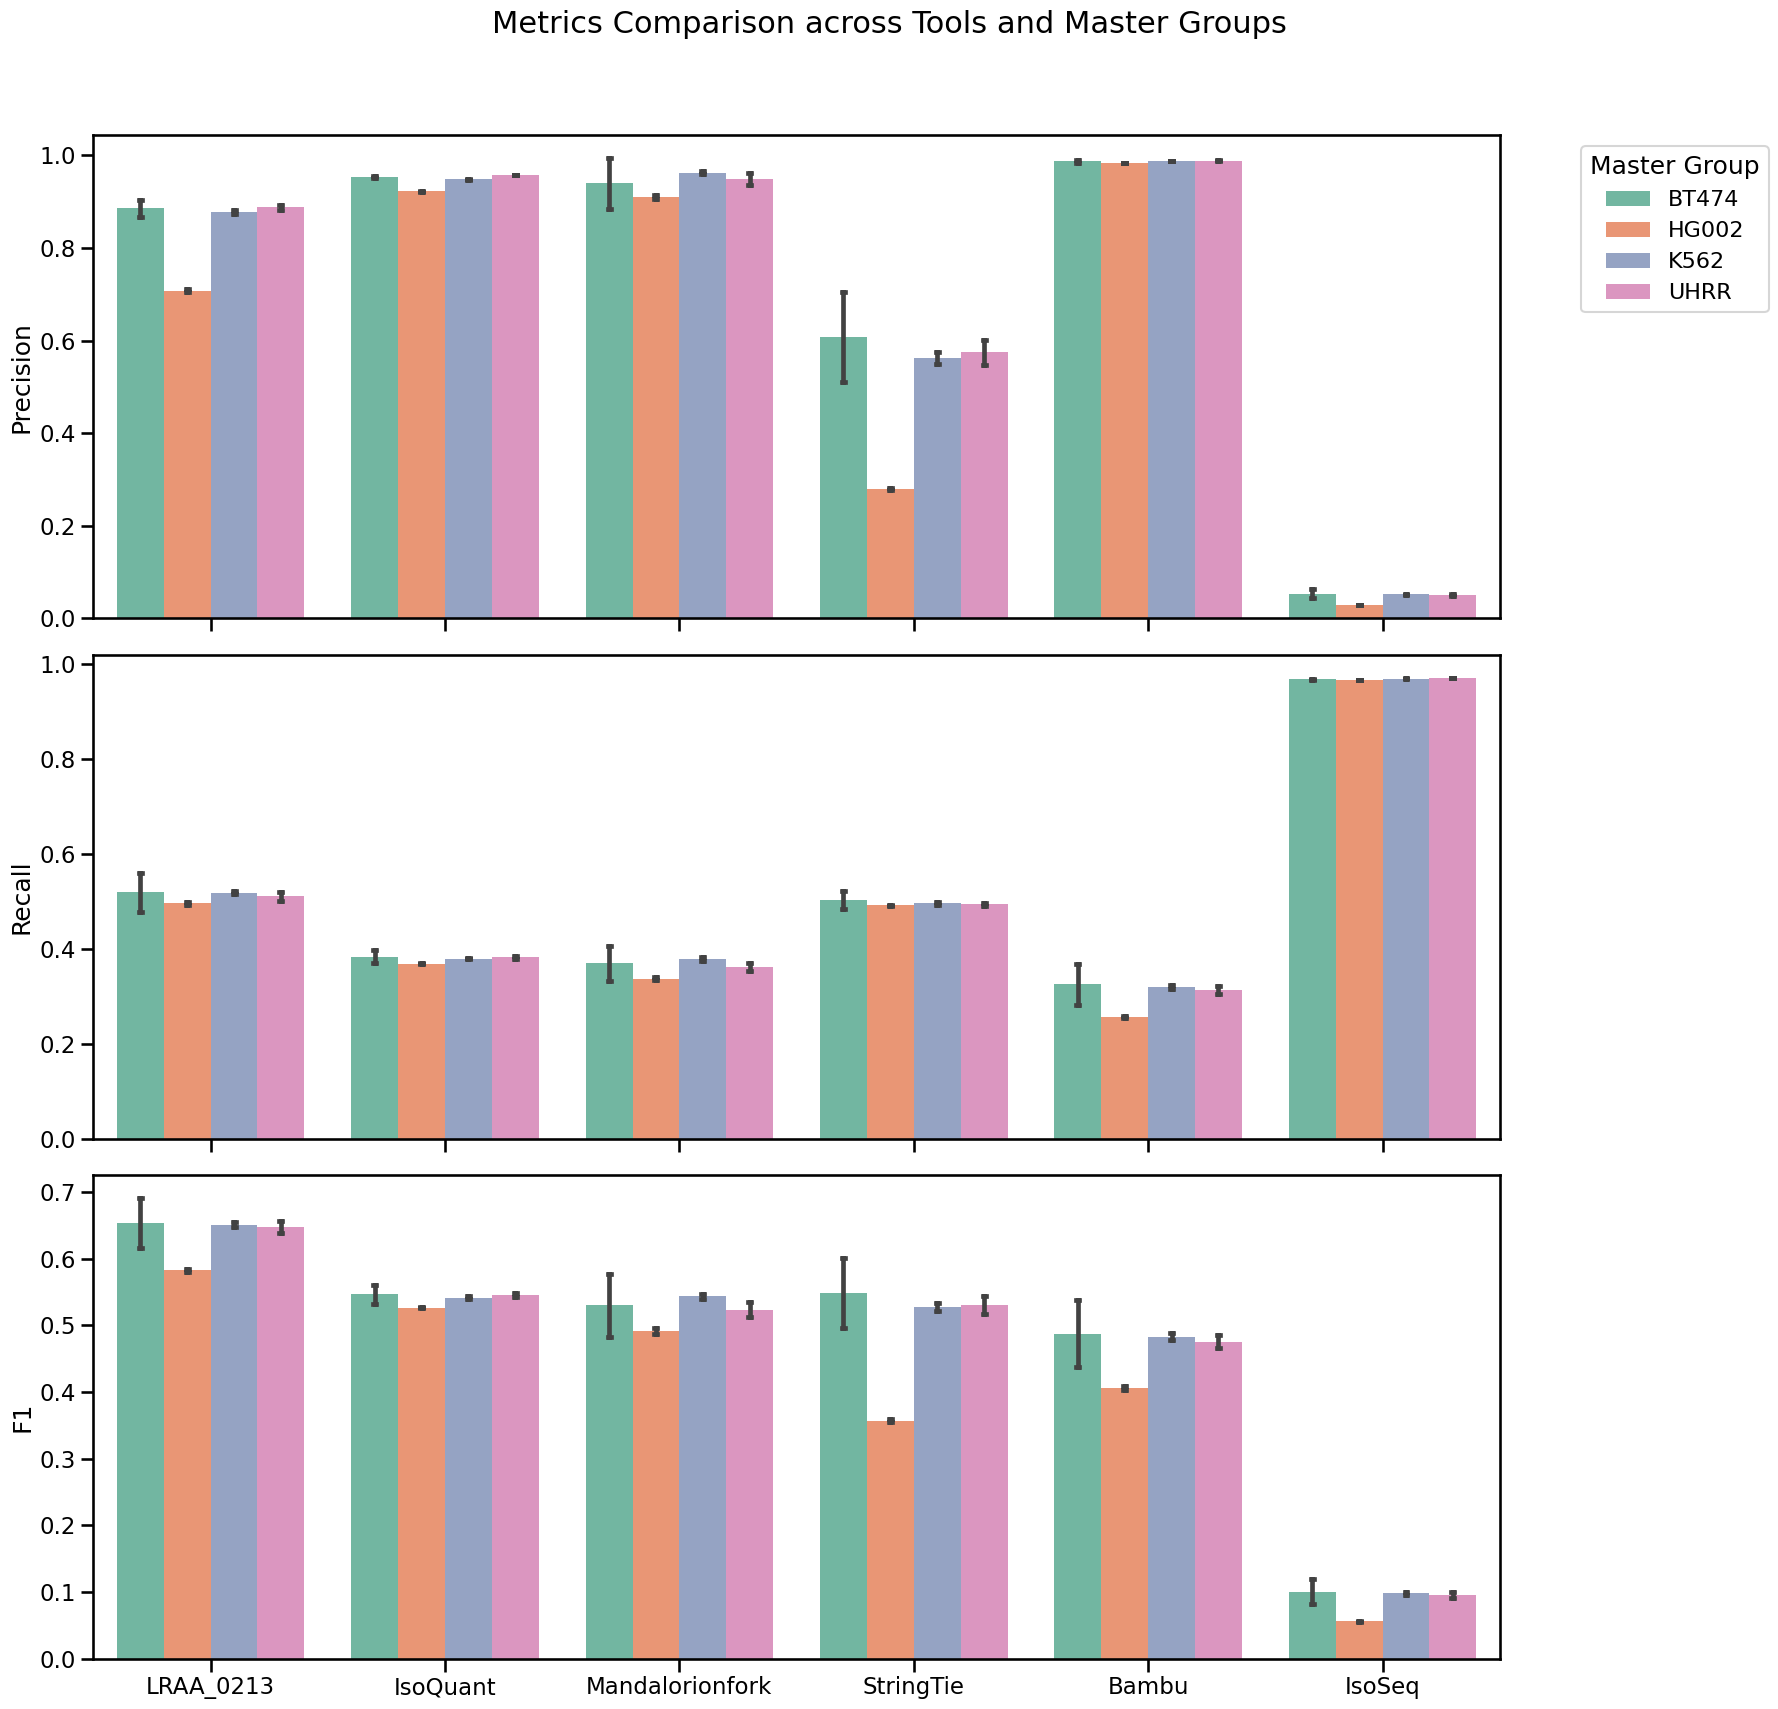

In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_metrics():
    base_dir = os.getcwd()

    folders = [
        "CL_BT474_E0_human", "CL_BT474_E1_human", "CL_BT474_E2_human", "CL_HG002_E0_human", "CL_HG002_E1_human",
        "CL_HG002_E2_human", "CL_K562_E0_human", "CL_K562_E1_human", "CL_K562_E2_human",
        "CL_UHRR_E0_human", "CL_UHRR_E1_human", "CL_UHRR_E2_human"
    ]

    # Combine all CSV files into a single DataFrame
    all_data = []
    for folder in folders:
        csv_file_path = os.path.join(base_dir, "benchmarking_results/4.cell_lines_pb", folder, "ID_reffree/id_reffree_benchmarking_results.csv")
        if os.path.exists(csv_file_path):
            df = pd.read_csv(csv_file_path)
            df['Folder'] = folder  # Add folder name to the DataFrame
            all_data.append(df)
        else:
            print(f"File not found: {csv_file_path}")

    df = pd.concat(all_data, ignore_index=True)

    # Define master groups
    master_groups = {
        'BT474': ['BT474'],
        'UHRR': ['UHRR'],
        'HG002': ['HG002'],
        'K562': ['K562']
    }

    # Function to identify master group based on the sample name
    def identify_master_group(row):
        for group_name, identifiers in master_groups.items():
            for identifier in identifiers:
                if identifier in row['Folder']:
                    return group_name
        return 'Other'

    # Apply the function to create a new column for the master group
    df['Master Group'] = df.apply(identify_master_group, axis=1)

    # Filter out rows that don't belong to any of the master groups
    df_filtered = df[df['Master Group'] != 'Other']

    # Set larger font sizes
    sns.set_context("talk")
    plt.rcParams.update({'font.size': 14})

    # Determine the order of tools based on the mean F1-Score
    tool_order = df_filtered.groupby('Tool')['F1'].mean().sort_values(ascending=False).index

    # Plotting
    fig, axes = plt.subplots(3, 1, figsize=(18, 18), sharex=True)  # 3 rows, 1 column for Precision, Recall, F1
    metrics = ['Precision', 'Recall', 'F1']

    for i, metric in enumerate(metrics):
        # For each metric, plot the data with error bars for each tool and master group
        sns.barplot(ax=axes[i], x='Tool', y=metric, hue='Master Group', data=df_filtered, palette="Set2", ci="sd", capsize=0.05, order=tool_order)
        axes[i].set_ylabel(metric, fontsize=18)
        axes[i].set_xlabel('')  # Set the x-axis label to an empty string
        if i != 0:  # Remove legend for plots other than the first
            axes[i].get_legend().remove()
    axes[0].legend(title='Master Group', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16, title_fontsize='18')

    plt.suptitle('Metrics Comparison across Tools and Master Groups', fontsize=22)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Save the plot and data
    output_dir = os.path.join(base_dir, "benchmarking_results/4.cell_lines_pb/")
    os.makedirs(output_dir, exist_ok=True)
    plot_file_path = os.path.join(output_dir, "ID_reffree_cell_lines_metrics_plot.png")
    data_file_path = os.path.join(output_dir, "ID_reffree_cell_lines_metrics_data.csv")

    plt.savefig(plot_file_path)
    df_filtered.to_csv(data_file_path, index=False)

    plt.show()

# Example usage
plot_metrics()

#### Refguided

In [12]:
import os
import shutil

def organize_files():
    base_dir = os.getcwd()
    folders = [
        "CL_BT474_E0_human", "CL_BT474_E1_human", "CL_BT474_E2_human", "CL_HG002_E0_human", "CL_HG002_E1_human",
        "CL_HG002_E2_human", "CL_K562_E0_human", "CL_K562_E1_human", "CL_K562_E2_human",
        "CL_UHRR_E0_human", "CL_UHRR_E1_human", "CL_UHRR_E2_human"
    ]

    reference_file = os.path.join(base_dir, "references/4.cell_lines_pb/GRCh38.gencode.v39.annotation_one_transcript_per_gene_with_exons_and_genes_ordered.gtf")

    for folder in folders:
        folder_path = os.path.join(base_dir, "terra_outputs/4.cell_lines_pb", folder, "ID_refguided")
        target_dir = os.path.join(folder_path, "Isosceles_strict_gtf")
        
        # Create the target directory if it doesn't exist
        os.makedirs(target_dir, exist_ok=True)
        
        # Move Isosceles_strict.gtf into the target directory
        source_file = os.path.join(folder_path, "Isosceles_strict.gtf")
        if os.path.exists(source_file):
            shutil.move(source_file, os.path.join(target_dir, "Isosceles_strict.gtf"))
            print(f"Moved {source_file} to {target_dir}")
        else:
            print(f"File not found: {source_file}")
        
        # Copy the reference file into the ID_refguided directory
        if os.path.exists(reference_file):
            shutil.copy(reference_file, folder_path)
            print(f"Copied {reference_file} to {folder_path}")
        else:
            print(f"Reference file not found: {reference_file}")
        
        # Move the Isosceles_strict_gtf folder one level up
        new_target_dir = os.path.join(base_dir, "terra_outputs/4.cell_lines_pb", folder, "Isosceles_strict_gtf")
        if os.path.exists(target_dir):
            shutil.move(target_dir, new_target_dir)
            print(f"Moved {target_dir} to {new_target_dir}")
        else:
            print(f"Directory not found: {target_dir}")

organize_files()
print("Completed organizing files.")

File not found: /home/jupyter/projects/LRAA_manuscript_benchmarking/terra_outputs/4.cell_lines_pb/CL_BT474_E0_human/ID_refguided/Isosceles_strict.gtf
Copied /home/jupyter/projects/LRAA_manuscript_benchmarking/references/4.cell_lines_pb/GRCh38.gencode.v39.annotation_one_transcript_per_gene_with_exons_and_genes_ordered.gtf to /home/jupyter/projects/LRAA_manuscript_benchmarking/terra_outputs/4.cell_lines_pb/CL_BT474_E0_human/ID_refguided


Error: Destination path '/home/jupyter/projects/LRAA_manuscript_benchmarking/terra_outputs/4.cell_lines_pb/CL_BT474_E0_human/Isosceles_strict_gtf/Isosceles_strict_gtf' already exists

In [5]:
import os
import shutil
import subprocess

# Add the directory containing gffcompare to the PATH environment variable
os.environ['PATH'] += os.pathsep + '/opt/conda/envs/mas_seq/bin'

# Define the 12 folders
folders = [
    'CL_BT474_E0_human', 'CL_BT474_E1_human', 'CL_BT474_E2_human',
    'CL_HG002_E0_human', 'CL_HG002_E1_human', 'CL_HG002_E2_human',
    'CL_K562_E0_human', 'CL_K562_E1_human', 'CL_K562_E2_human',
    'CL_UHRR_E0_human', 'CL_UHRR_E1_human', 'CL_UHRR_E2_human'
]

# Define the subdirectories
subdirs = ['ID_refguided']

# Define the base paths
base_path = os.getcwd()
benchmarking_script = os.path.join(base_path, 'benchmarking_scripts/bmarking_scripts/VennReco_BenchmarkingRealdata.py')

# Ensure the log directory exists
log_dir = os.path.join(base_path, 'log')
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# Define placeholders for missing variables
ref_expressed_gtf = os.path.join(base_path, 'references/4.cell_lines_pb/GRCh38.gencode.v39.annotation.sorted.gtf')

# Define the parameter for the dataset
dataset_param = '4.cell_lines_pb'

# Open a log file to capture the output
with open(os.path.join(log_dir, 'script_run_history10.log'), 'w') as log_file:
    for folder in folders:
        for subdir in subdirs:
            working_dir = os.path.join(base_path, f'benchmarking_results/{dataset_param}/{folder}/{subdir}/')

            # Ensure the working directory exists, and overwrite if it already exists
            if os.path.exists(working_dir):
                shutil.rmtree(working_dir)
            os.makedirs(working_dir)

            # Change the current working directory
            os.chdir(working_dir)

            # Define reco_gtfs and dataset_name based on folder and subdir
            reco_gtfs = os.path.join(base_path, f'terra_outputs/{dataset_param}/{folder}/{subdir}/*')
            dataset_name = f'{folder}_{subdir.lower()}'

            # Run the benchmarking script
            command = f'python3 {benchmarking_script} --ref_expressed_or_kept_gtf {ref_expressed_gtf} --reco_gtfs {reco_gtfs} --dataset_name {dataset_name}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)

            # Remove .tmap files from the references directory
            command = f'rm {os.path.join(base_path, f"references/{dataset_param}/{folder}/*.tmap")}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)

            command = f'rm {os.path.join(base_path, f"terra_outputs/{dataset_param}/{folder}/{subdir}/*.tmap")}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)

            command = f'rm {os.path.join(base_path, f"terra_outputs/{dataset_param}/{folder}/ID_reffree/*.refmap")}'
            log_file.write(f'Running command: {command}\n')
            subprocess.run(command, shell=True, stdout=log_file, stderr=log_file)

            # Move back to base directory
            os.chdir(base_path)


In [8]:
import os
import pandas as pd

def generate_metrics():
    base_dir = os.getcwd()

    folders = [
        "CL_BT474_E0_human", "CL_BT474_E1_human", "CL_BT474_E2_human",
        "CL_HG002_E0_human", "CL_HG002_E1_human", "CL_HG002_E2_human",
        "CL_K562_E0_human", "CL_K562_E1_human", "CL_K562_E2_human",
        "CL_UHRR_E0_human", "CL_UHRR_E1_human", "CL_UHRR_E2_human"
    ]

    def calculate_metrics_for_tool(folder_name):
        tracking_file_path = os.path.join(base_dir, "benchmarking_results/4.cell_lines_pb", folder_name, "ID_refguided/TALON.denovo.tracking")

        # Define tools excluding IsoSeq and the reference
        tools = ["Bambu", "ESPRESSO", "FLAMES", "Flair", "IsoQuant", "IsoSeq", "Isosceles_loose", "LRAA_0214", "Mandalorionfork", "StringTie", "TALON"]

        metrics_by_tool = {tool: {'TP': 0, 'FP': 0, 'FN': 0, 'Precision': 0, 'Recall': 0, 'F1': 0} for tool in tools}

        with open(tracking_file_path, 'r') as file:
            for line in file:
                columns = line.strip().split('\t')
                if len(columns) < 12:  # Ensure there are enough columns
                    print(f"Skipping line with insufficient columns: {line}")
                    continue

                ref1 = columns[4]  # Adjusted index for ref1
                ref2 = columns[9]  # Adjusted index for ref2
                # Adjust indices to skip ref2 column
                tool_predictions = columns[5:9] + columns[10:]  # Assuming ref2 is at index 8

                if len(tool_predictions) != len(tools):
                    print(f"Skipping line with mismatched tool predictions: {line}")
                    continue

                ref1_present = ref1 != '-'
                ref2_present = ref2 != '-'
                predictions = [pred != '-' for pred in tool_predictions]
                unique_predictions = sum(predictions) == 1

                for tool_index, prediction in enumerate(predictions):
                    if tool_index >= len(tools):
                        print(f"Skipping prediction with out-of-range tool index: {tool_index}")
                        continue

                    if ref1_present and not ref2_present and prediction:
                        metrics_by_tool[tools[tool_index]]['TP'] += 1
                    if not ref1_present and not ref2_present and prediction and unique_predictions:
                        metrics_by_tool[tools[tool_index]]['FP'] += 1
                    if ref1_present and not ref2_present and not prediction:
                        other_tools_prediction = sum(predictions) - prediction  # Subtract current tool's prediction
                        if other_tools_prediction > 0:  # If there's at least one other tool predicting
                            metrics_by_tool[tools[tool_index]]['FN'] += 1

        for tool, metrics in metrics_by_tool.items():
            TP = metrics['TP']
            FP = metrics['FP']
            FN = metrics['FN']
            Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
            Recall = TP / (TP + FN) if (TP + FN) > 0 else 0
            F1 = 2 * (Precision * Recall) / (Precision + Recall) if (Precision + Recall) > 0 else 0
            metrics.update({'Precision': Precision, 'Recall': Recall, 'F1': F1})

        return metrics_by_tool

    for folder in folders:
        metrics_by_tool = calculate_metrics_for_tool(folder)
        results = []
        for tool_name, metrics in metrics_by_tool.items():
            results.append({
                'Folder': folder,
                'Tool': tool_name,
                **metrics
            })

        df = pd.DataFrame(results)
        csv_file_path = os.path.join(base_dir, "benchmarking_results/4.cell_lines_pb", folder, "ID_refguided/id_refguided_benchmarking_results.csv")
        df.to_csv(csv_file_path, index=False)
        print(f"Results saved to {csv_file_path}")

generate_metrics()
print("Completed metrics generation.")

Results saved to /home/jupyter/projects/LRAA_manuscript_benchmarking/benchmarking_results/4.cell_lines_pb/CL_BT474_E0_human/ID_refguided/id_refguided_benchmarking_results.csv
Results saved to /home/jupyter/projects/LRAA_manuscript_benchmarking/benchmarking_results/4.cell_lines_pb/CL_BT474_E1_human/ID_refguided/id_refguided_benchmarking_results.csv
Results saved to /home/jupyter/projects/LRAA_manuscript_benchmarking/benchmarking_results/4.cell_lines_pb/CL_BT474_E2_human/ID_refguided/id_refguided_benchmarking_results.csv
Results saved to /home/jupyter/projects/LRAA_manuscript_benchmarking/benchmarking_results/4.cell_lines_pb/CL_HG002_E0_human/ID_refguided/id_refguided_benchmarking_results.csv
Results saved to /home/jupyter/projects/LRAA_manuscript_benchmarking/benchmarking_results/4.cell_lines_pb/CL_HG002_E1_human/ID_refguided/id_refguided_benchmarking_results.csv
Results saved to /home/jupyter/projects/LRAA_manuscript_benchmarking/benchmarking_results/4.cell_lines_pb/CL_HG002_E2_human/I

/var/tmp/ipykernel_192745/2013673844.py:63: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(ax=axes[i], x='Tool', y=metric, hue='Master Group', data=df_filtered, palette="Set2", ci="sd", capsize=0.05, order=tool_order)
/var/tmp/ipykernel_192745/2013673844.py:63: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(ax=axes[i], x='Tool', y=metric, hue='Master Group', data=df_filtered, palette="Set2", ci="sd", capsize=0.05, order=tool_order)
/var/tmp/ipykernel_192745/2013673844.py:63: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(ax=axes[i], x='Tool', y=metric, hue='Master Group', data=df_filtered, palette="Set2", ci="sd", capsize=0.05, order=tool_order)


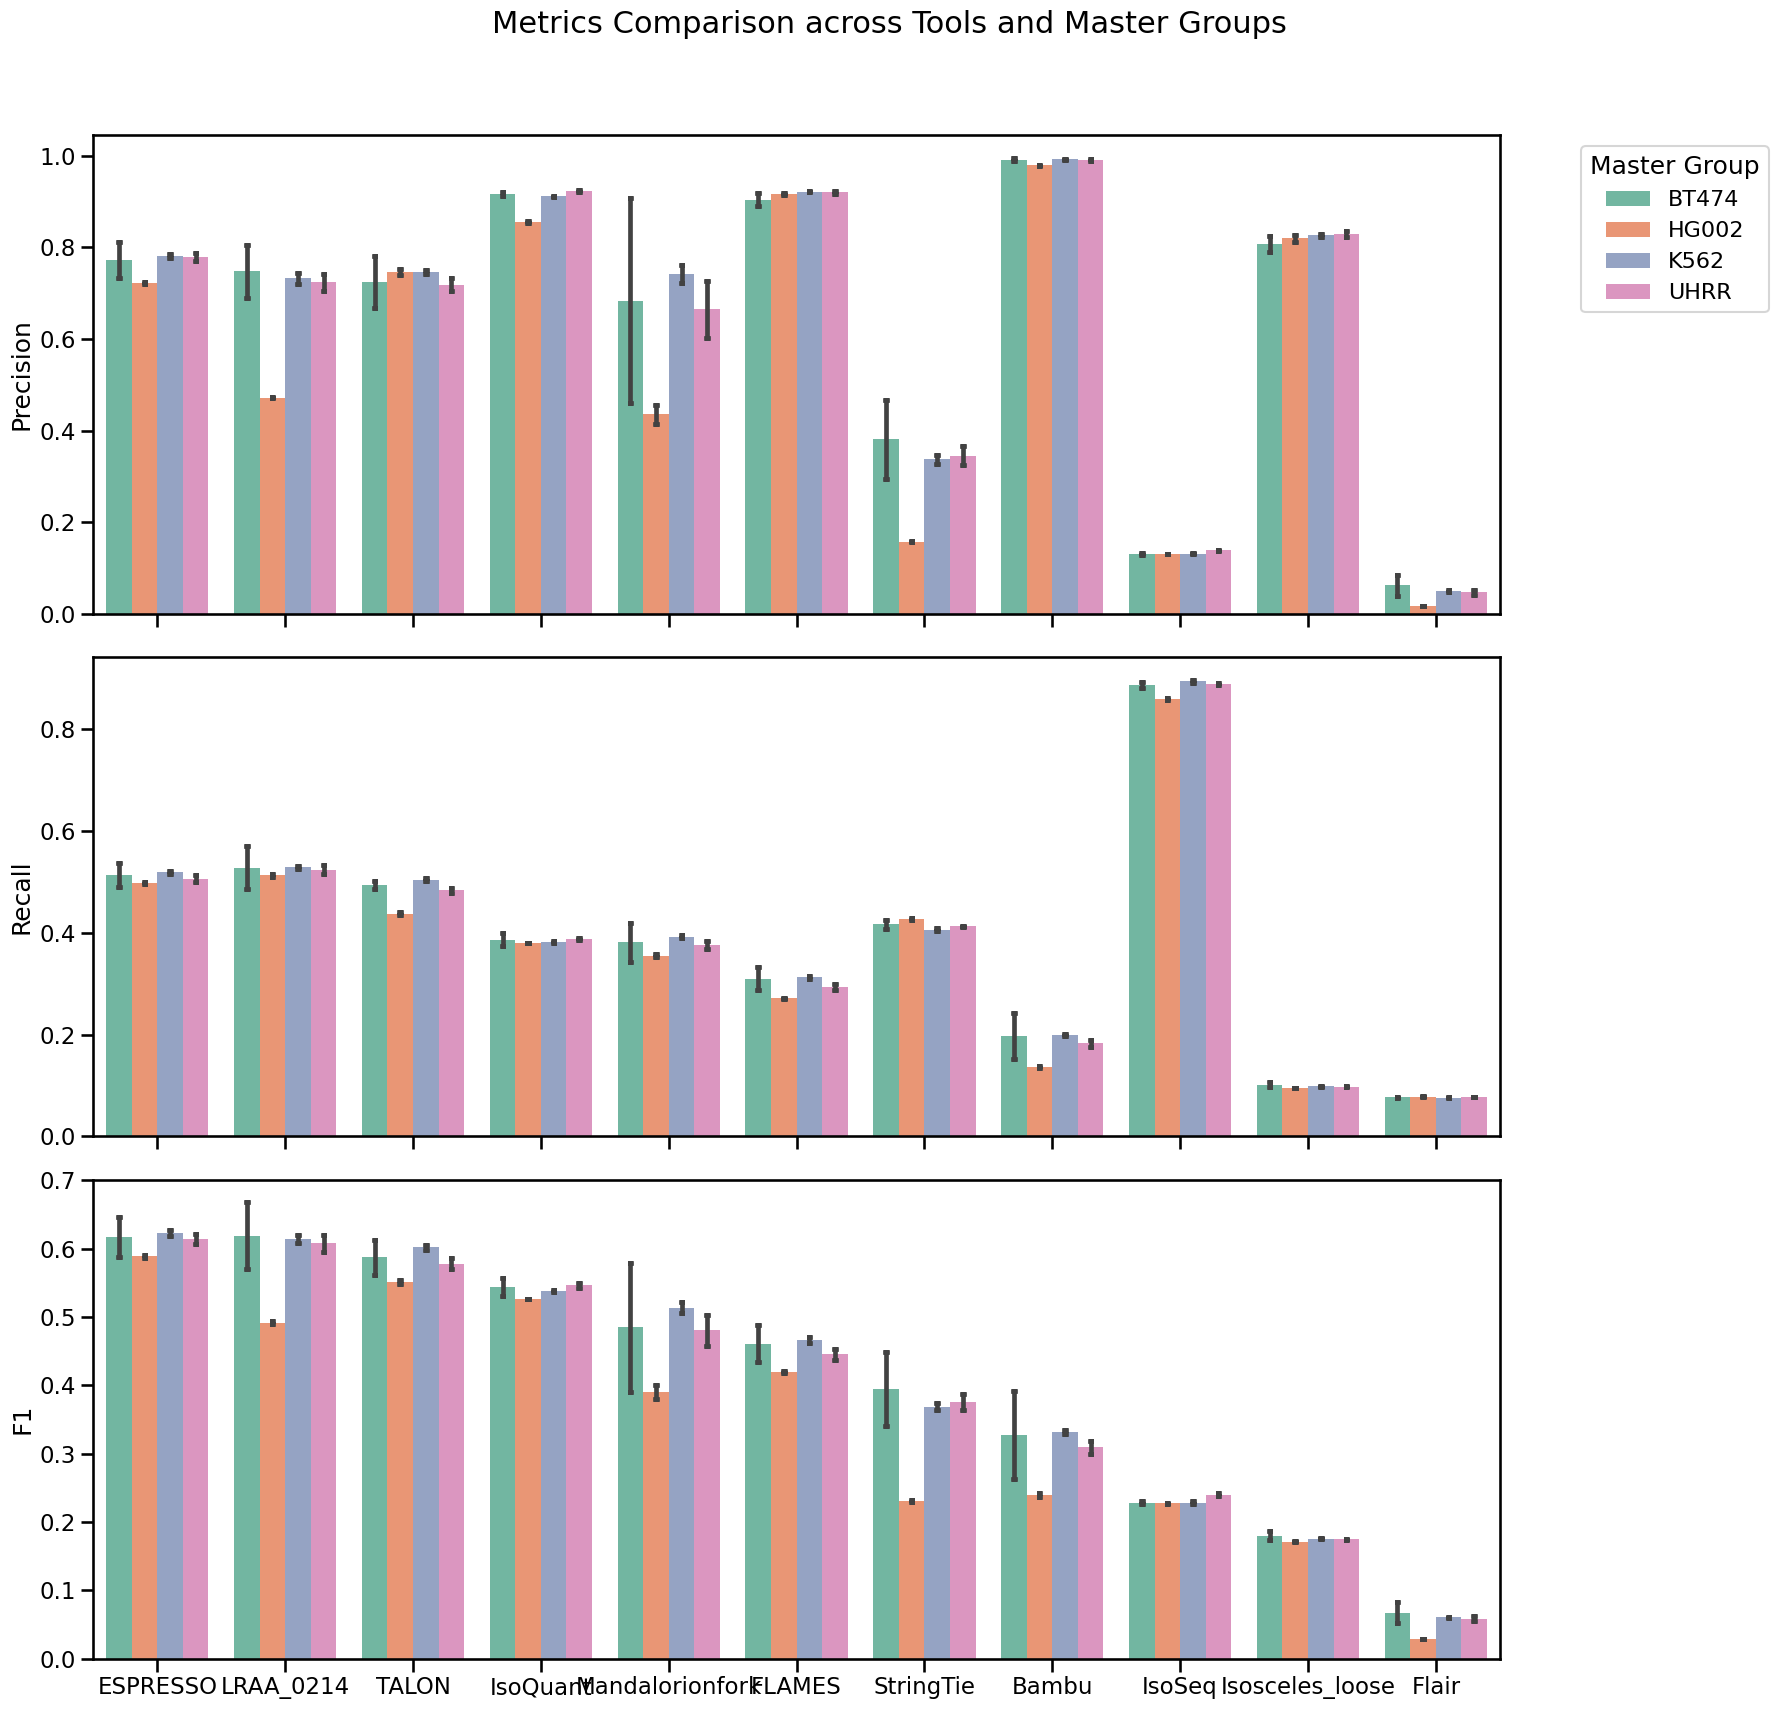

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_metrics():
    base_dir = os.getcwd()

    folders = [
        "CL_BT474_E0_human", "CL_BT474_E1_human", "CL_BT474_E2_human", "CL_HG002_E0_human", "CL_HG002_E1_human",
        "CL_HG002_E2_human", "CL_K562_E0_human", "CL_K562_E1_human", "CL_K562_E2_human",
        "CL_UHRR_E0_human", "CL_UHRR_E1_human", "CL_UHRR_E2_human"
    ]

    # Combine all CSV files into a single DataFrame
    all_data = []
    for folder in folders:
        csv_file_path = os.path.join(base_dir, "benchmarking_results/4.cell_lines_pb", folder, "ID_refguided/id_refguided_benchmarking_results.csv")
        if os.path.exists(csv_file_path):
            df = pd.read_csv(csv_file_path)
            df['Folder'] = folder  # Add folder name to the DataFrame
            all_data.append(df)
        else:
            print(f"File not found: {csv_file_path}")

    df = pd.concat(all_data, ignore_index=True)

    # Define master groups
    master_groups = {
        'BT474': ['BT474'],
        'UHRR': ['UHRR'],
        'HG002': ['HG002'],
        'K562': ['K562']
    }

    # Function to identify master group based on the sample name
    def identify_master_group(row):
        for group_name, identifiers in master_groups.items():
            for identifier in identifiers:
                if identifier in row['Folder']:
                    return group_name
        return 'Other'

    # Apply the function to create a new column for the master group
    df['Master Group'] = df.apply(identify_master_group, axis=1)

    # Filter out rows that don't belong to any of the master groups
    df_filtered = df[df['Master Group'] != 'Other']

    # Set larger font sizes
    sns.set_context("talk")
    plt.rcParams.update({'font.size': 14})

    # Determine the order of tools based on the mean F1-Score
    tool_order = df_filtered.groupby('Tool')['F1'].mean().sort_values(ascending=False).index

    # Plotting
    fig, axes = plt.subplots(3, 1, figsize=(18, 18), sharex=True)  # 3 rows, 1 column for Precision, Recall, F1
    metrics = ['Precision', 'Recall', 'F1']

    for i, metric in enumerate(metrics):
        # For each metric, plot the data with error bars for each tool and master group
        sns.barplot(ax=axes[i], x='Tool', y=metric, hue='Master Group', data=df_filtered, palette="Set2", ci="sd", capsize=0.05, order=tool_order)
        axes[i].set_ylabel(metric, fontsize=18)
        axes[i].set_xlabel('')  # Set the x-axis label to an empty string
        if i != 0:  # Remove legend for plots other than the first
            axes[i].get_legend().remove()
    axes[0].legend(title='Master Group', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16, title_fontsize='18')

    plt.suptitle('Metrics Comparison across Tools and Master Groups', fontsize=22)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Save the plot and data
    output_dir = os.path.join(base_dir, "benchmarking_results/4.cell_lines_pb")
    os.makedirs(output_dir, exist_ok=True)
    plot_file_path = os.path.join(output_dir, "ID_refguided_cell_lines_metrics_plot.png")
    data_file_path = os.path.join(output_dir, "ID_refguided_cell_lines_metrics_data.csv")

    plt.savefig(plot_file_path)
    df_filtered.to_csv(data_file_path, index=False)

    plt.show()

# Example usage
plot_metrics()

### Merge the outputs

In [4]:
import os
from PIL import Image
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter

# Define the directory containing the PNG files
directory = "benchmarking_results/1.isoseqsim_pb"

# Define the output PDF file name
output_pdf = "combined_ID_metrics_plots.pdf"

# Get a sorted list of all PNG files in the directory
png_files = sorted([f for f in os.listdir(directory) if f.endswith('.png')])

# Create a canvas for the PDF
c = canvas.Canvas(output_pdf, pagesize=letter)

# Loop through the sorted PNG files and add them to the PDF
for png_file in png_files:
    img_path = os.path.join(directory, png_file)
    img = Image.open(img_path)
    img_width, img_height = img.size
    aspect_ratio = img_height / float(img_width)
    page_width, page_height = letter
    new_height = page_width * aspect_ratio
    if new_height > page_height:
        new_height = page_height
        new_width = page_height / aspect_ratio
    else:
        new_width = page_width
    c.setPageSize((new_width, new_height))
    c.drawImage(img_path, 0, 0, width=new_width, height=new_height)
    c.showPage()

# Save the PDF
c.save()

print(f"Merged PDF created: {output_pdf}")

Merged PDF created: combined_ID_metrics_plots.pdf


In [2]:
import sys
print(sys.executable)

/opt/conda/envs/mas_seq/bin/python3.12


In [3]:
!{sys.executable} -m pip install reportlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 11.0 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 16.0 MB/s eta 0:00:00
